
# <span style="color:rgb(213,80,0)">Transformed Fish Morphology data.</span>

This file creates Figures 8.35-8.38

## Beginning of code

In [1]:
load ('fishmilr.txt');
size(fishmilr)

ans = 1x2    
    59    10

In [2]:

y = fishmilr(:,10);
X = fishmilr(:,1:9);

prin=0;

conflev=[0.95 0.99];

## Create Figure 8.35

S estimators with 2 values of bdp


In [3]:
% Note that the pattern of residuals changes completely
% Using bdp=0.5 the outliers are correctly found, on the other hand using
% bdp=0.25 the masking effect is clear
figure;
h1=subplot(2,1,1);
bdp=0.25;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  2.51 seconds

In [4]:
resindexplot(out,'h',h1,'conflev',conflev);
ylabel(['Breakdown point =' num2str(bdp)])

h2=subplot(2,1,2);
bdp=0.5;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  2.44 seconds


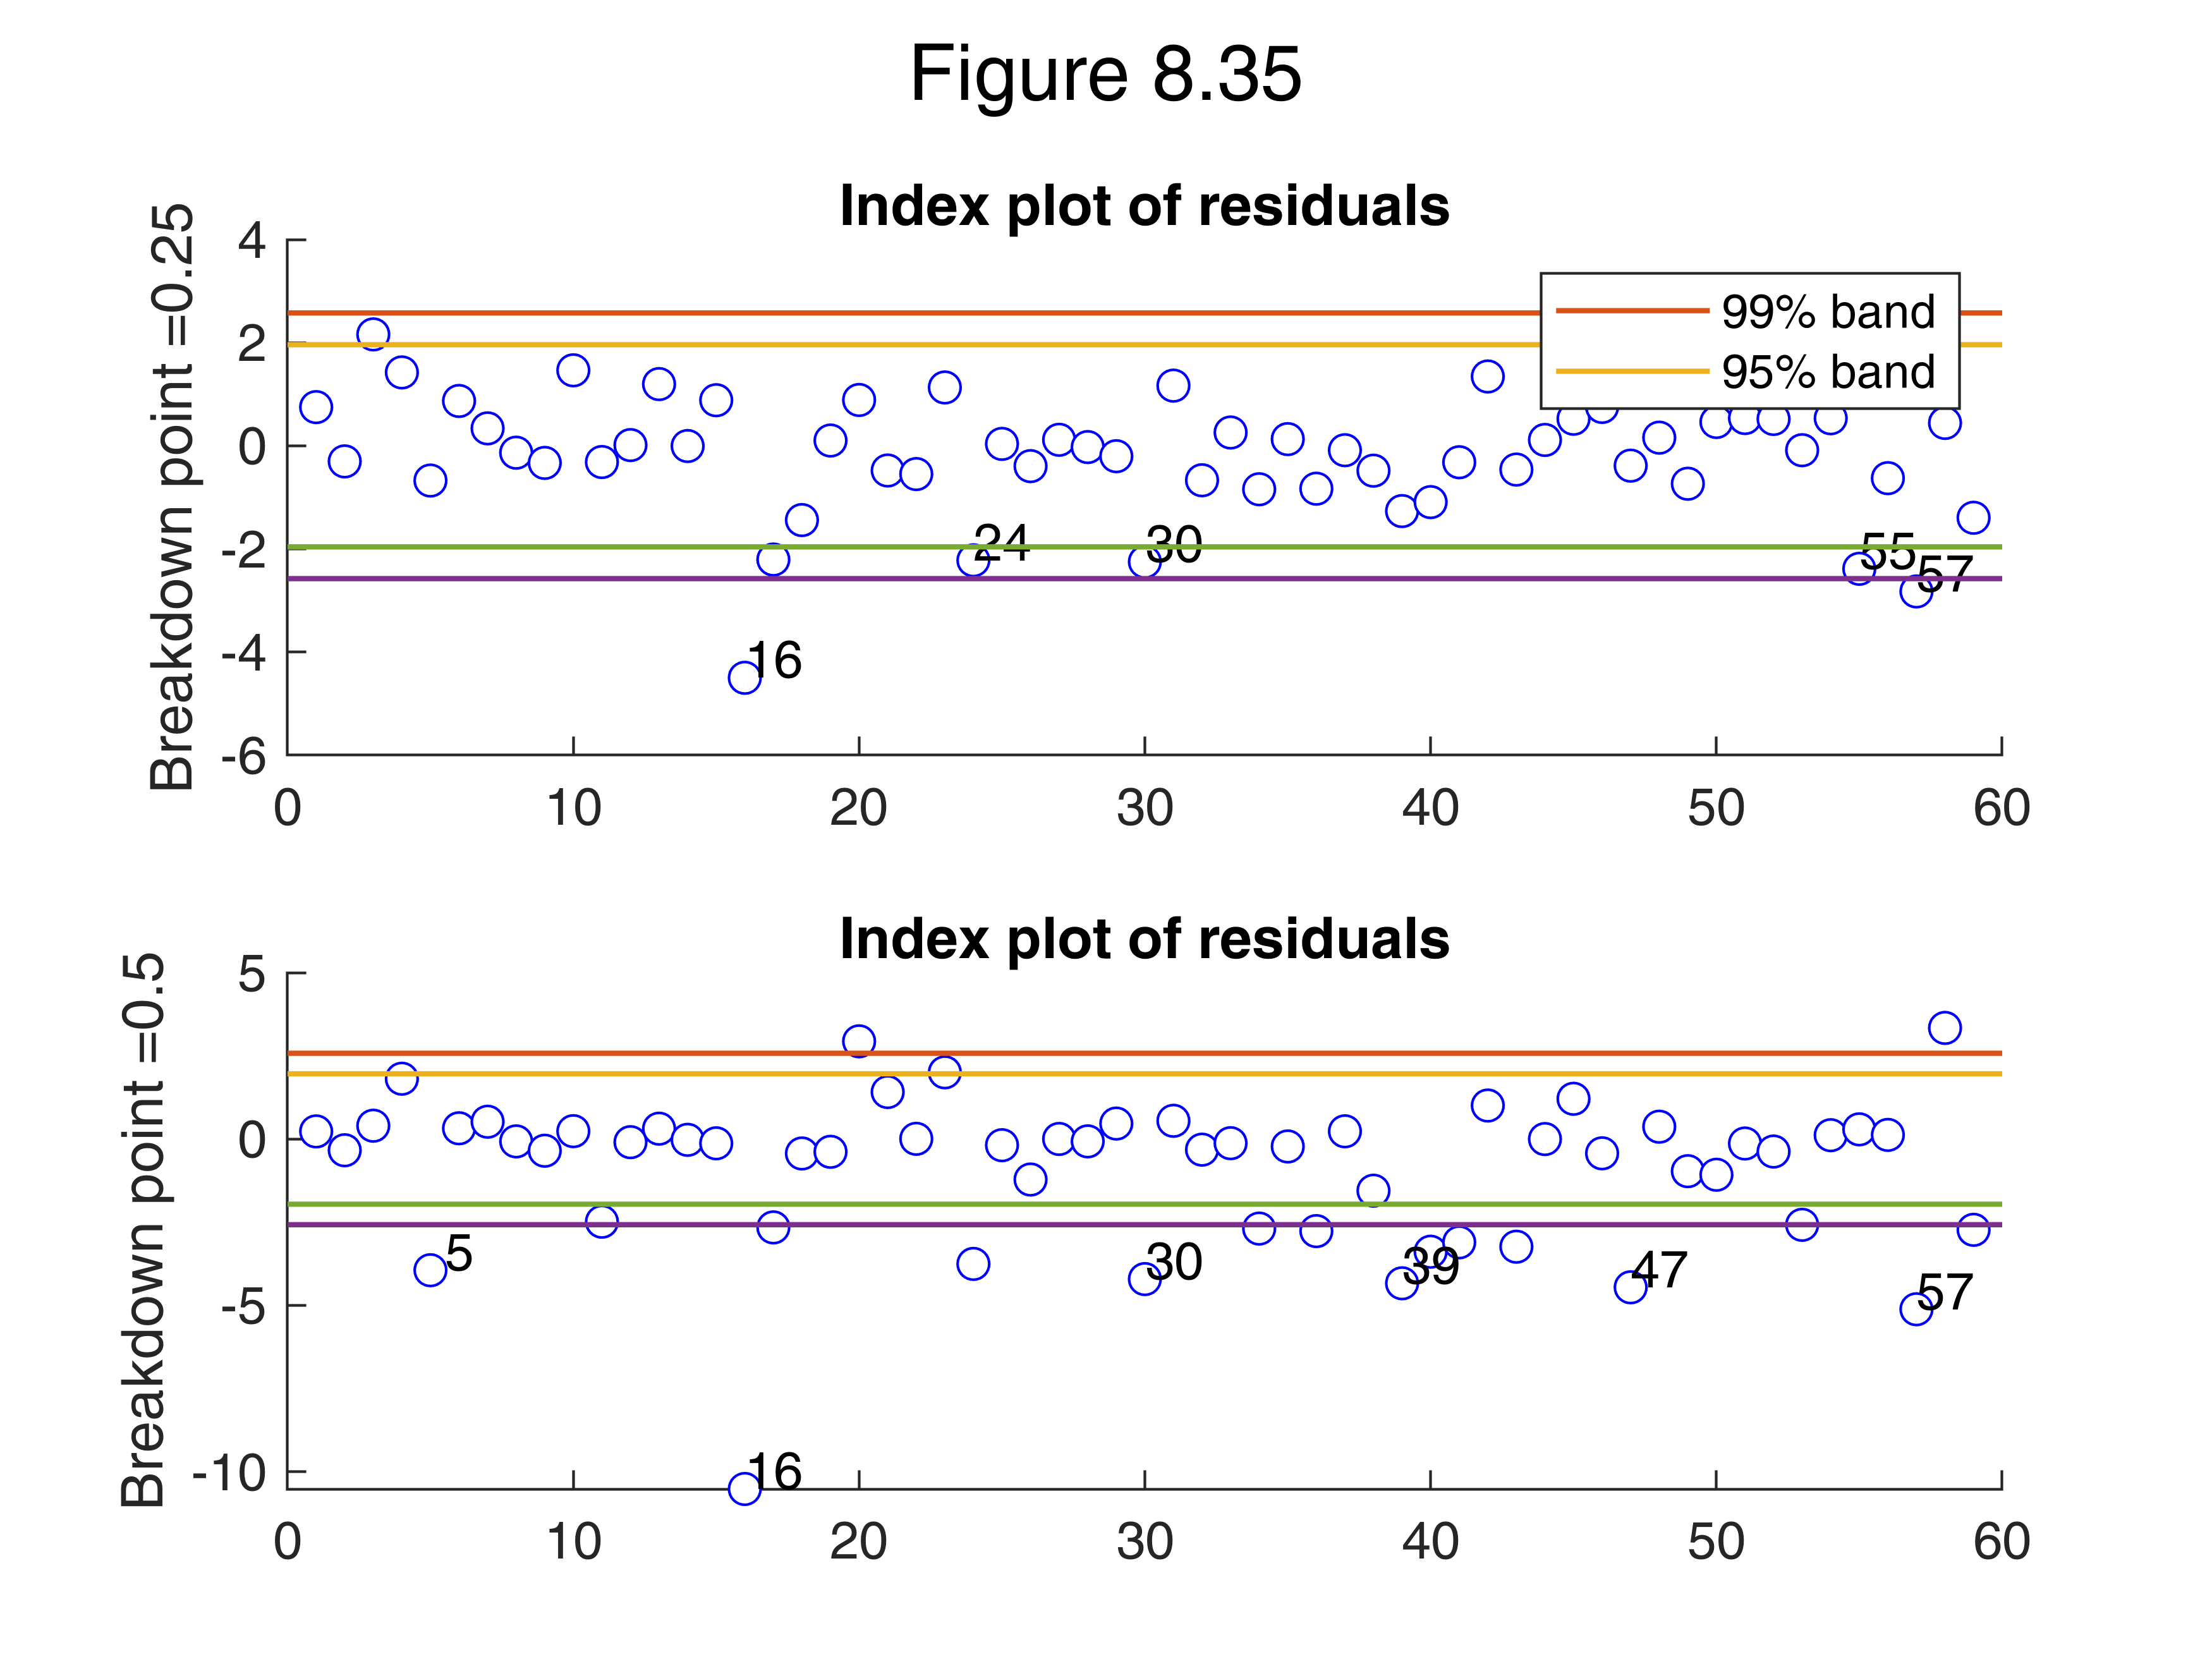

In [5]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{6});
ylabel(['Breakdown point =' num2str(bdp)])
cascade;
if prin==1
    % print to postscript
    print -depsc fishmilr_S.eps;
end

sgtitle('Figure 8.35')
set(gcf,"Name",'Figure 8.35')

In [6]:
drawnow

## Create Figure 8.36

MM estimators with 2 values of efficiency MMreg using two different level of efficiency Note that the pattern of residuals changes completely Using eff=0.90 the outliers are correctly found, on the other hand using eff=0.95 the masking effect is clear


In [7]:
figure;
h1=subplot(2,1,1);
eff=0.80;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  2.43 seconds

In [8]:
resindexplot(out,'h',h1,'conflev',conflev,'numlab',{6});
ylabel(['Eff.=' num2str(eff)])
h2=subplot(2,1,2);
eff=0.99;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  2.15 seconds


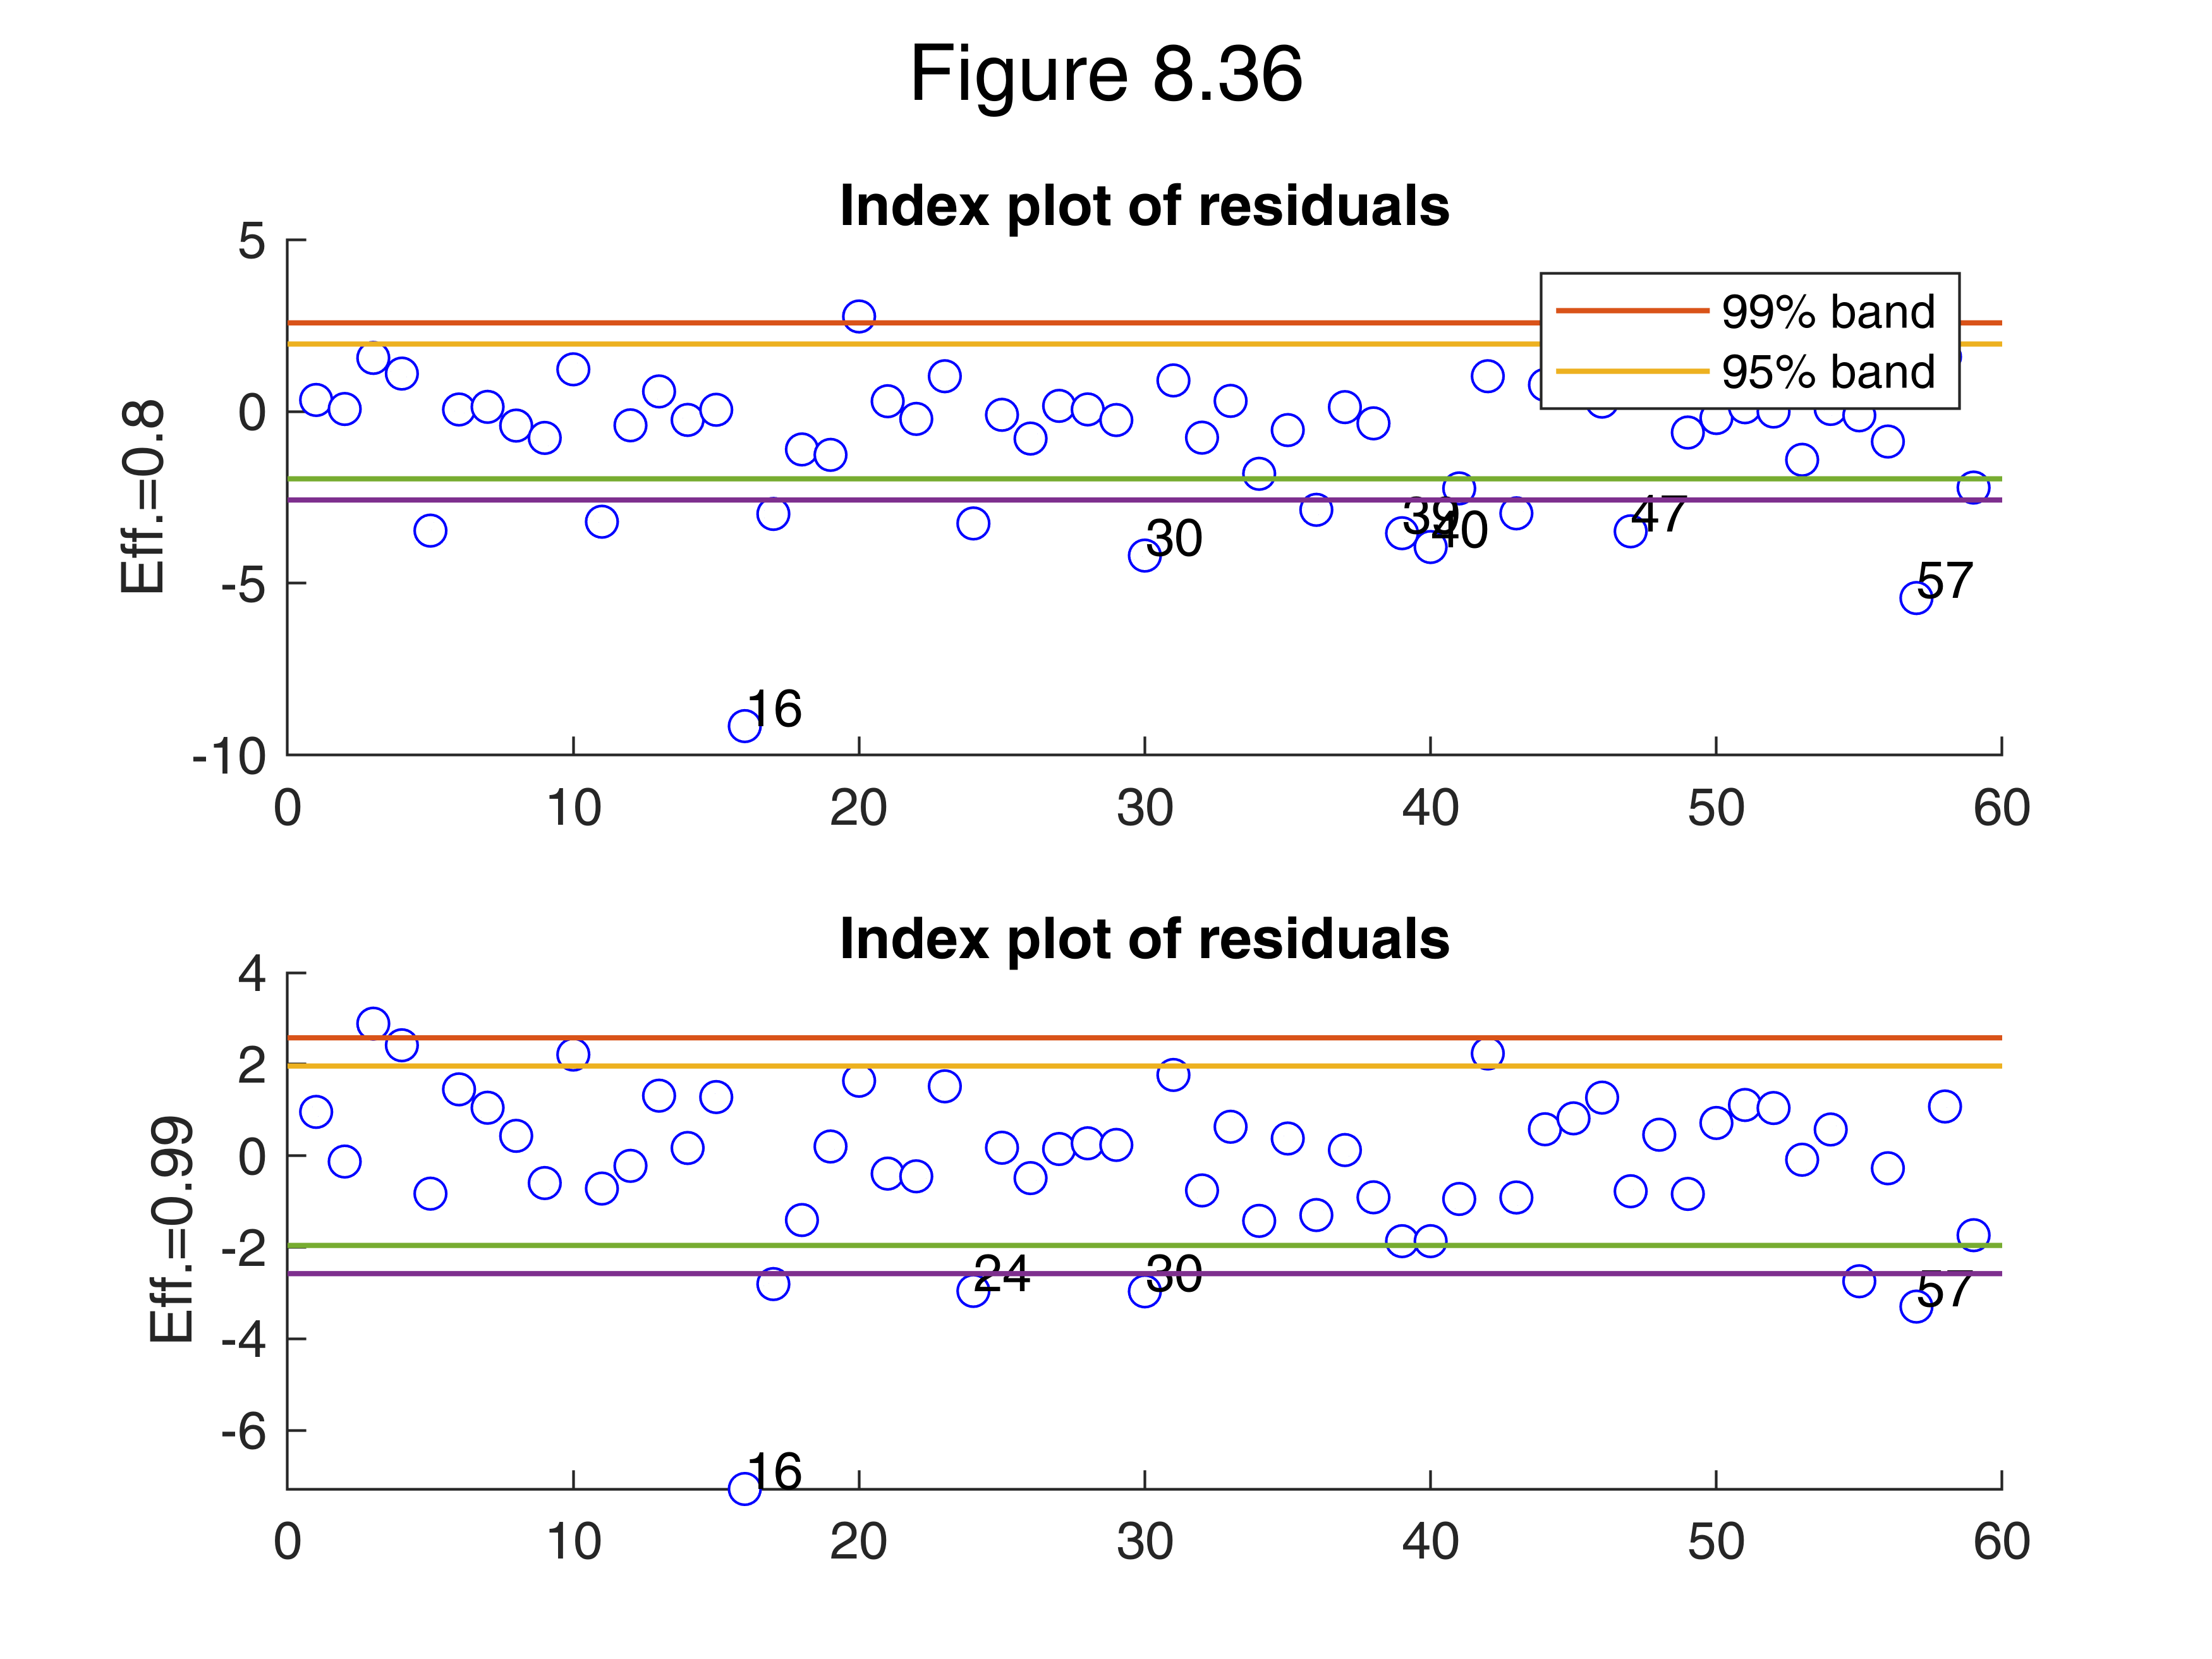

In [9]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{4});
ylabel(['Eff.=' num2str(eff)])
if prin==1
    % print to postscript
    print -depsc fishmilr_MM.eps;
end

sgtitle('Figure 8.36')
set(gcf,"Name",'Figure 8.36')

In [10]:
drawnow

## Forward search

No signal during the search


In [11]:
fsout=FSR(y, X,'plots',0);

-------------------------
Signal detection loop
Sample seems homogeneous, no outlier has been found
Summary of the exceedances
           1          99         999        9999       99999
           1           1           1           0           0

## Create Figure 8.37

Monitoring S estimates



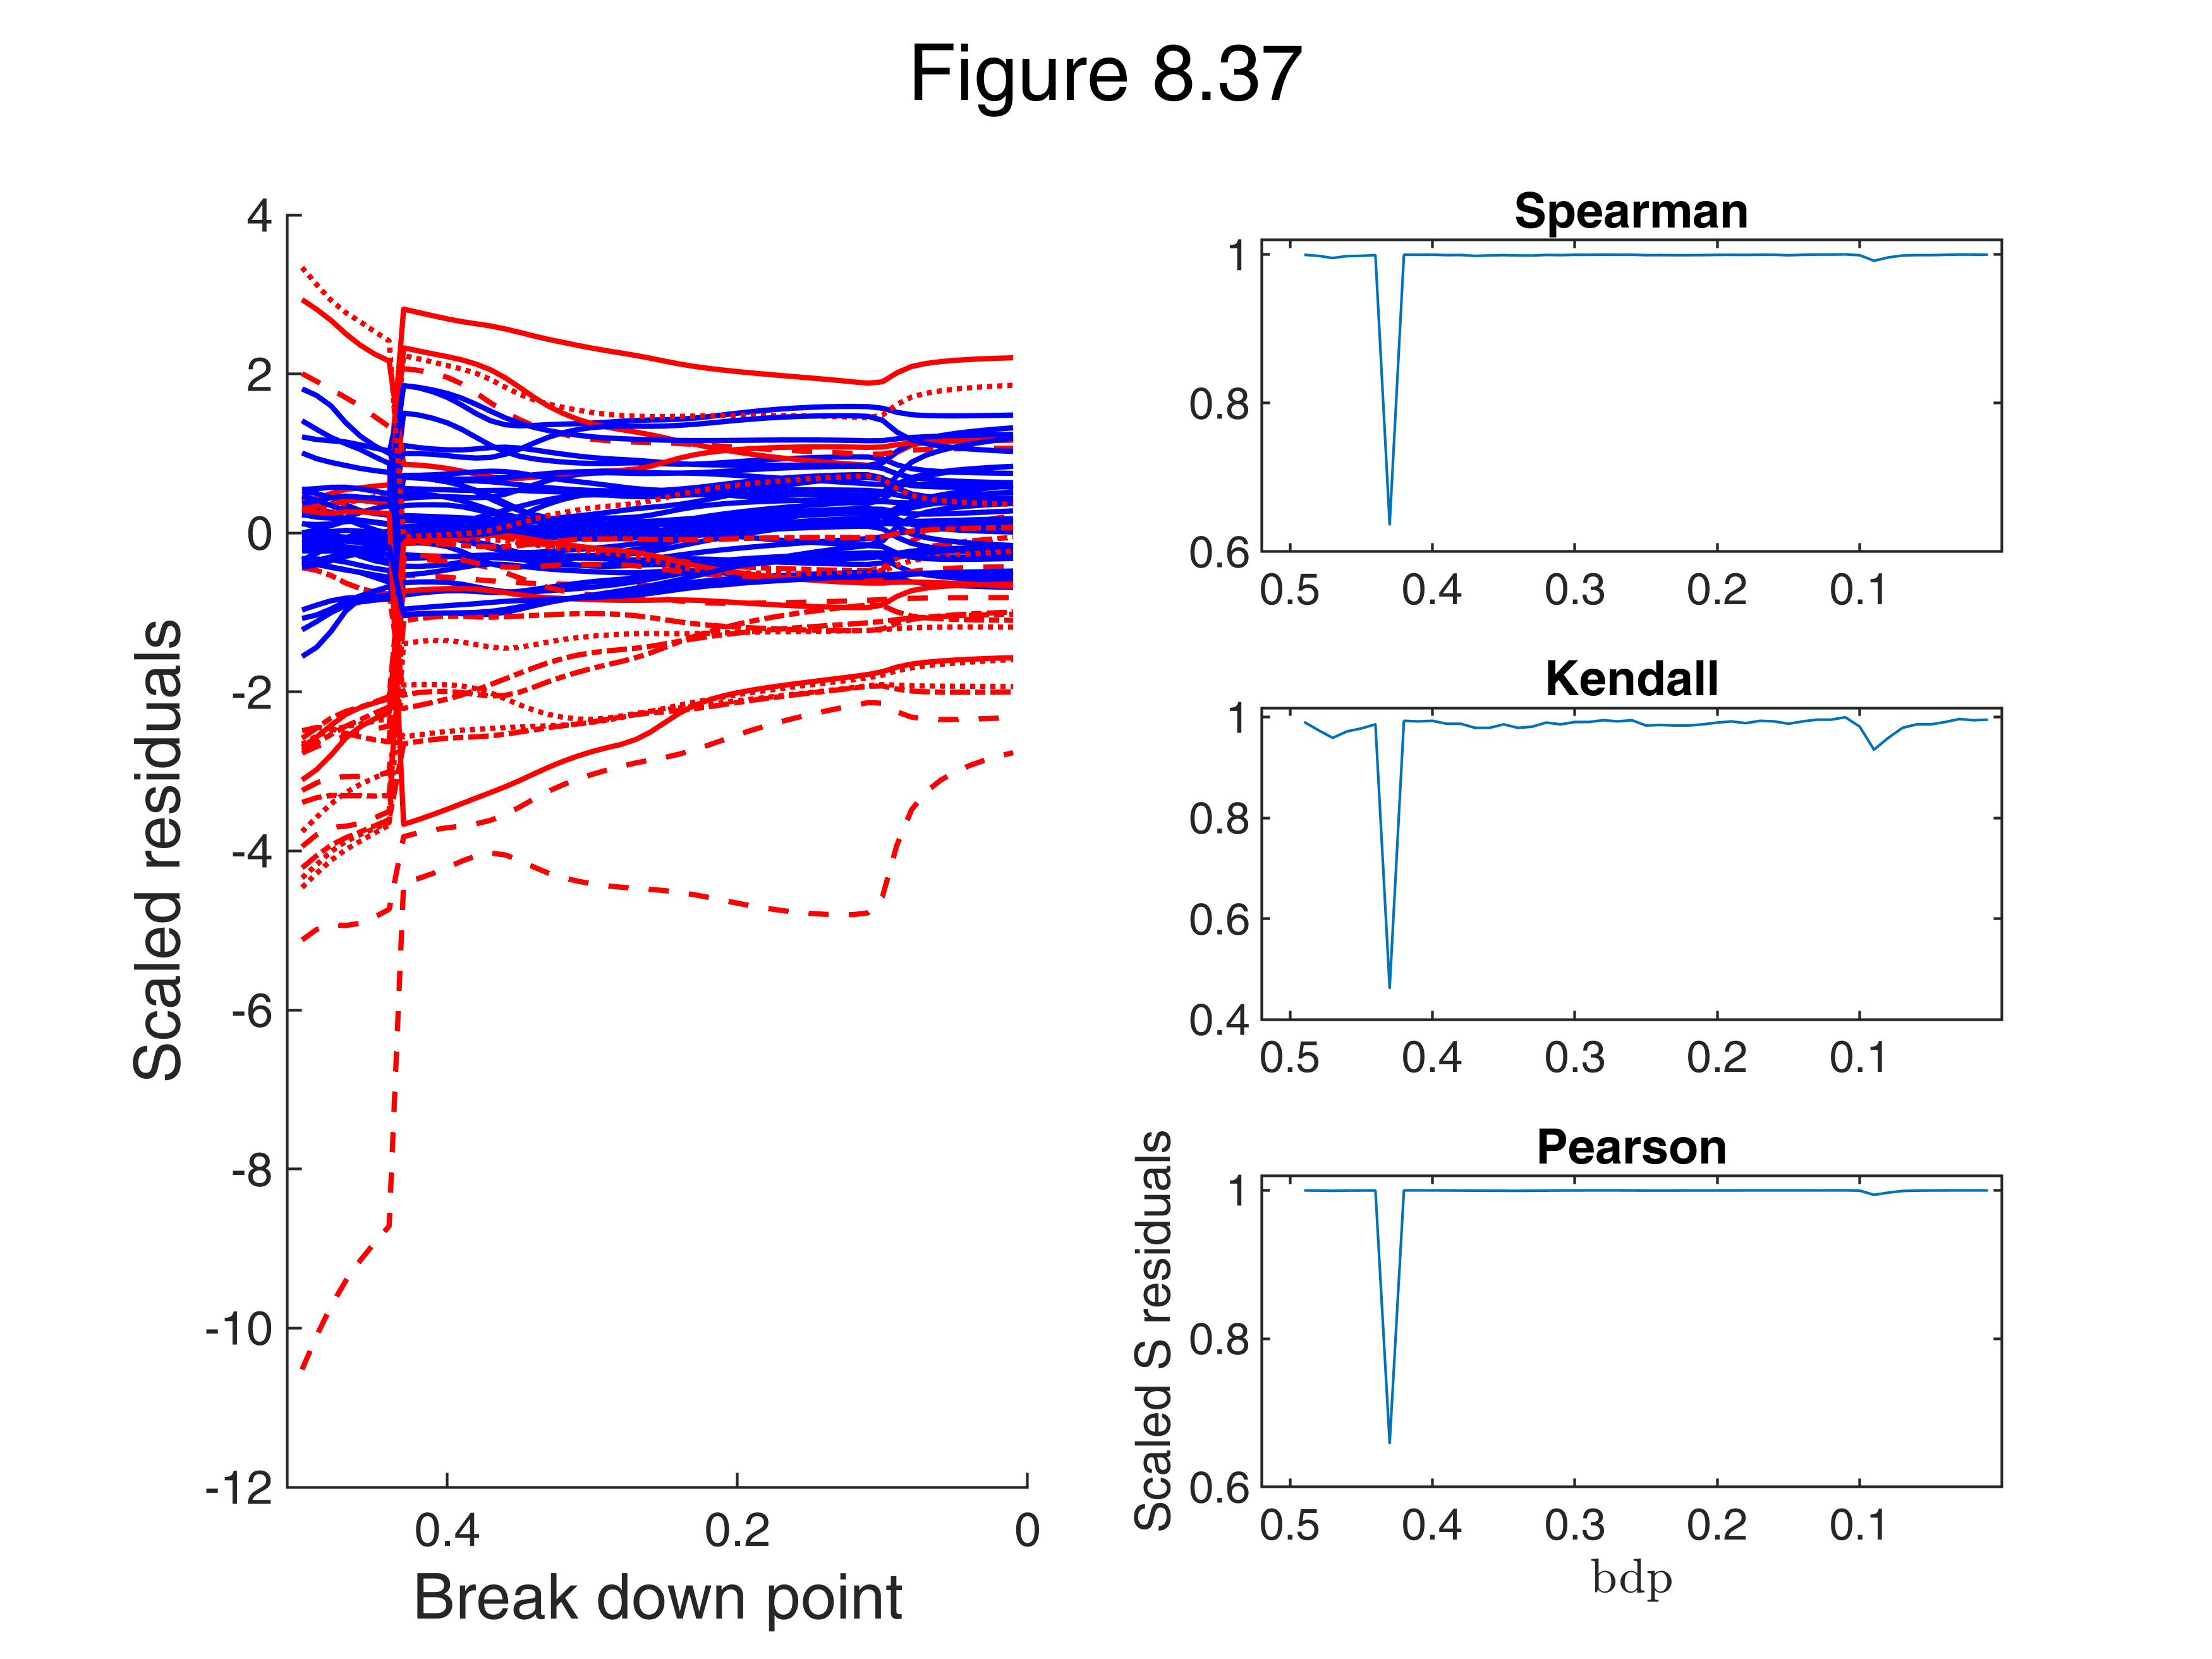

In [12]:
[out]=Sregeda(y,X,'msg',0);
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1,'tag','pl_Sres');
ylabel('Scaled S residuals');
xlabel('bdp');

if prin==1
    % print to postscript
    print -depsc fishmilr_S_mon.eps;
end
sgtitle('Figure 8.37')
set(gcf,"Name",'Figure 8.37')

In [13]:
drawnow

## Create Figure 8.38

Monitoring MM estimtes


In [14]:
[out]=MMregeda(y,X);

Total estimated time to complete S estimate:  0.04 seconds


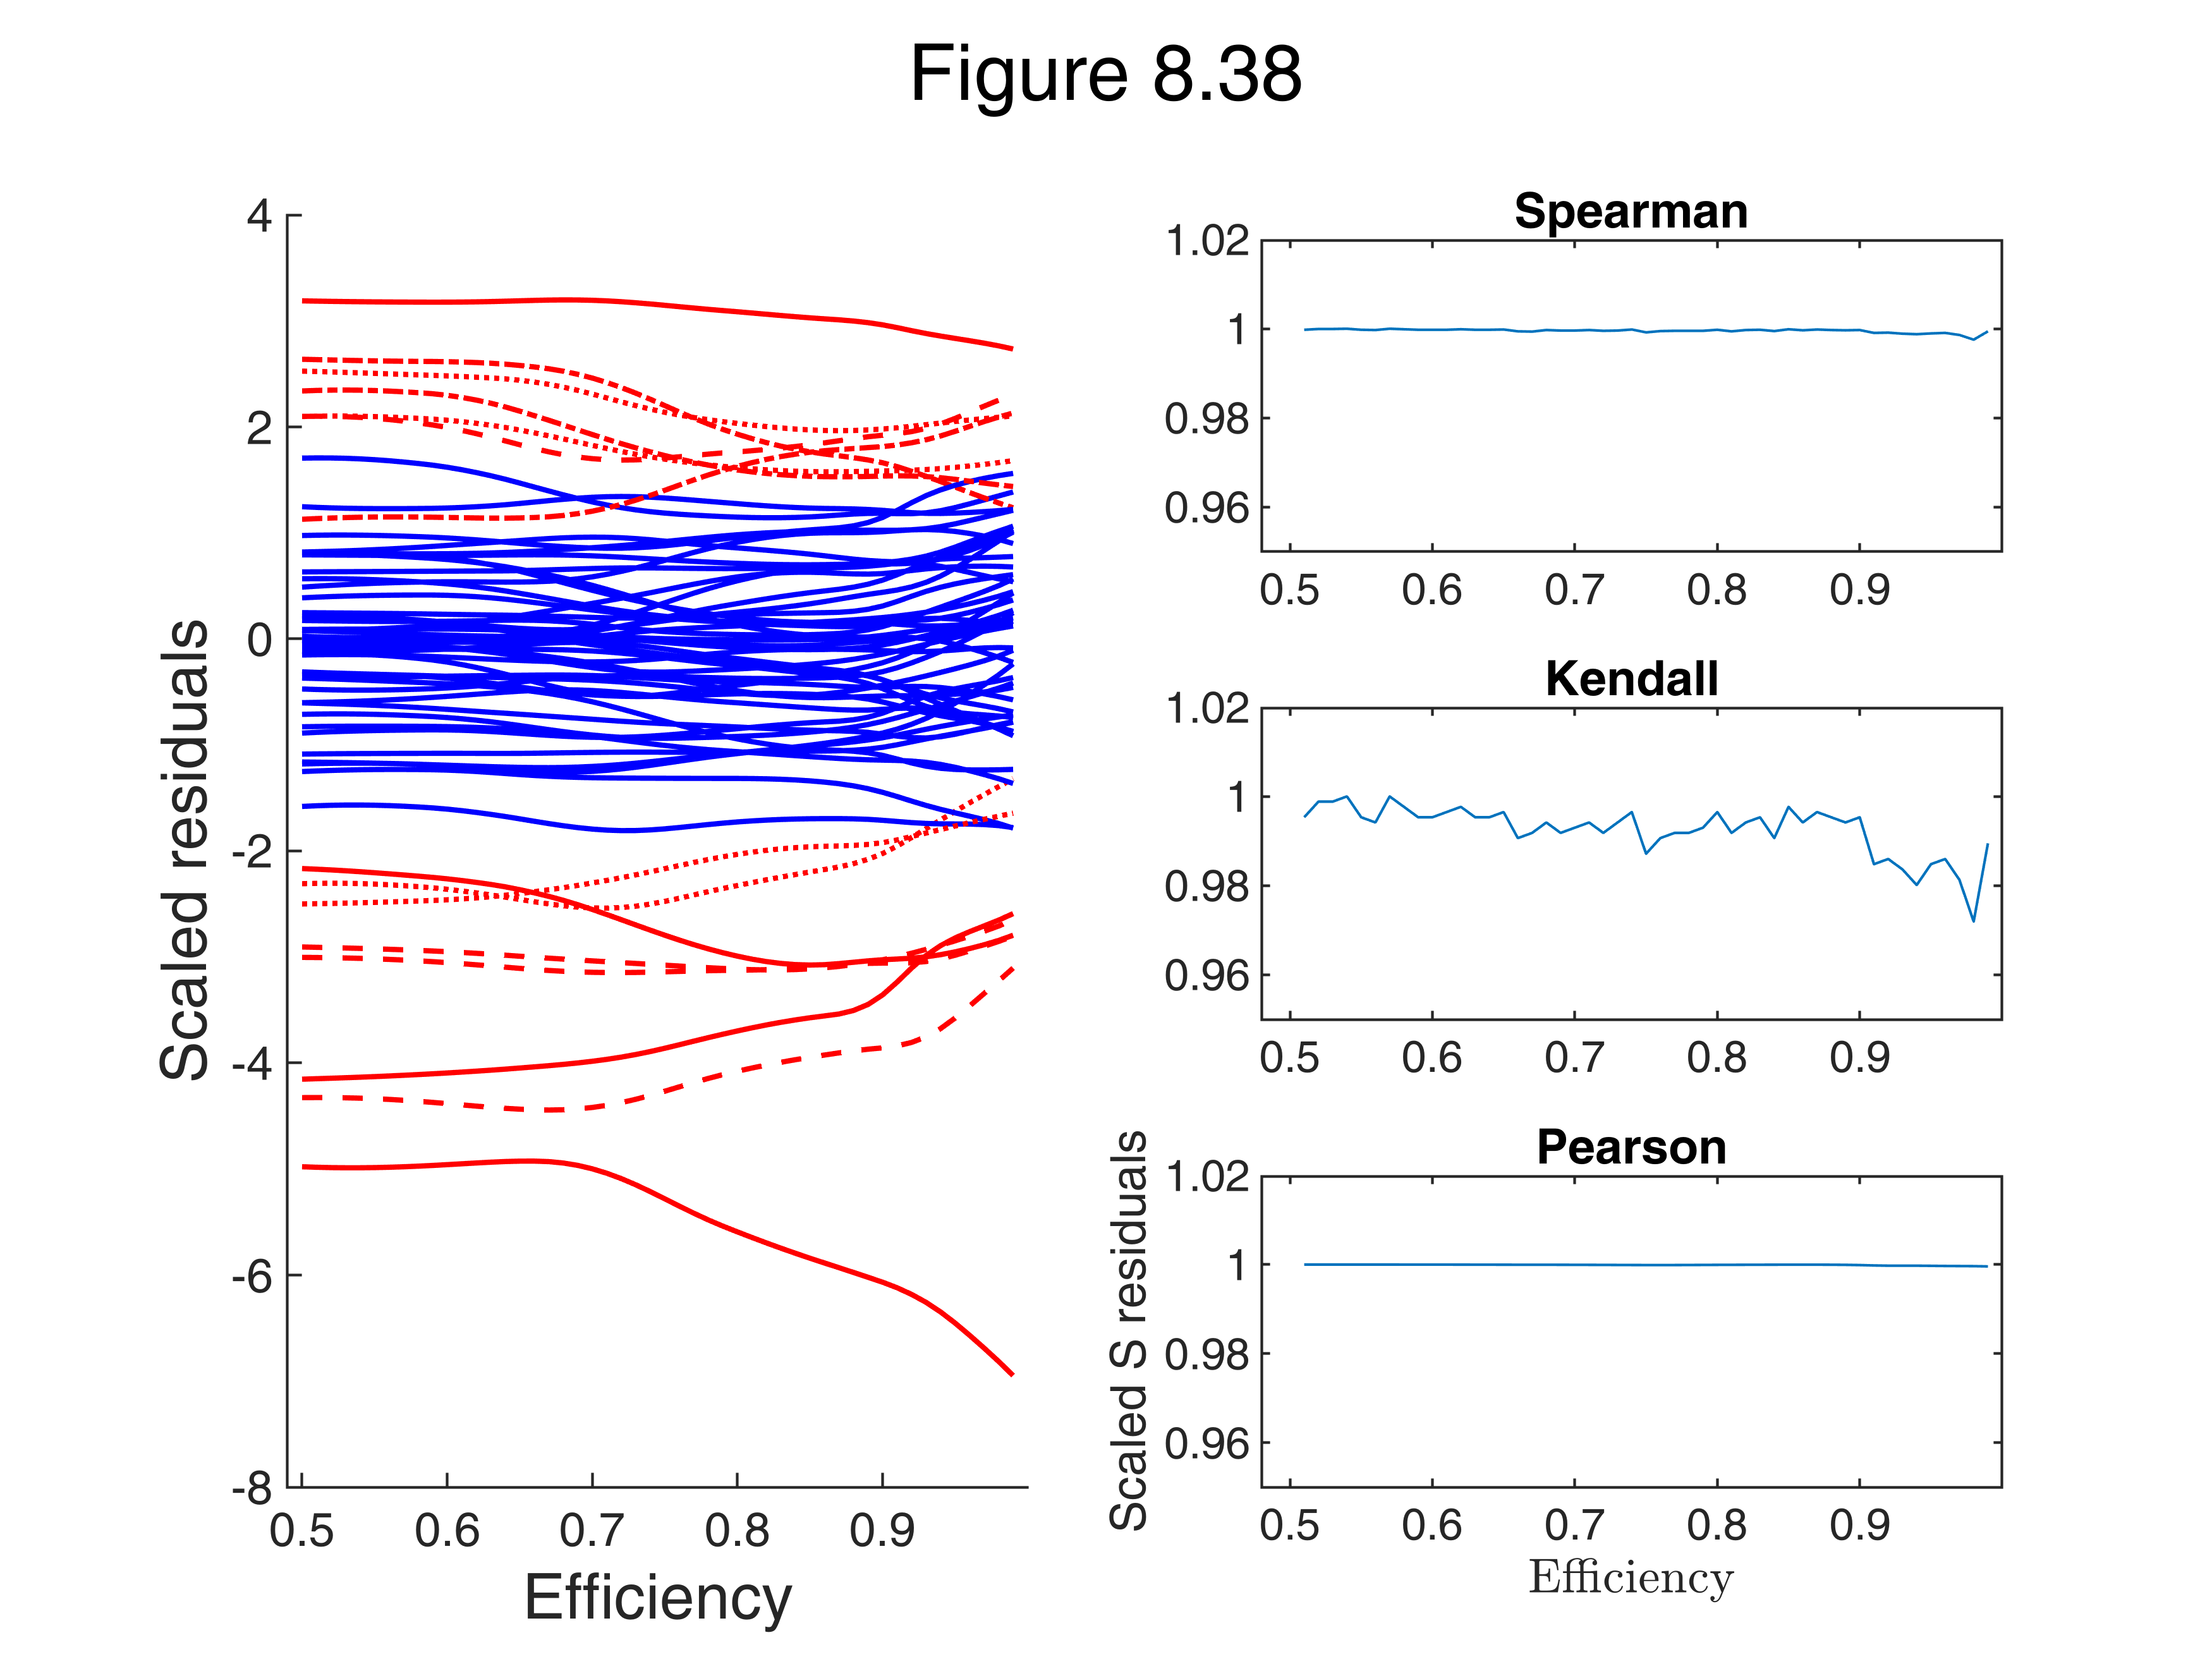

In [15]:
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1);
ylabel('Scaled S residuals');
xlabel('Efficiency');

if prin==1
    % print to postscript
    print -depsc fishmilr_MM_mon.eps;
end

sgtitle('Figure 8.38')
set(gcf,"Name",'Figure 8.38')

In [16]:

%InsideREADME